<a href="https://colab.research.google.com/github/Vimlesh-Maurya/Python/blob/main/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!gdown "1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f" -O aerofit.csv

Downloading...
From: https://drive.google.com/uc?id=1n9268qSj_5Q7KS_ntpv-wFPQC1UyJh6f
To: /content/aerofit.csv
100% 7.46k/7.46k [00:00<00:00, 22.6MB/s]


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal, f_oneway, ttest_ind, ttest_1samp, ttest_rel


In [7]:
df = pd.read_csv('/content/aerofit.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [9]:
# Lets create new col group

np.random.seed(42)
df['new_group'] = np.random.choice(['g1','g2','g3'], size = len(df))
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,new_group
0,KP281,18,Male,14,Single,3,4,29562,112,g3
1,KP281,19,Male,15,Single,2,3,31836,75,g1
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g3
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1


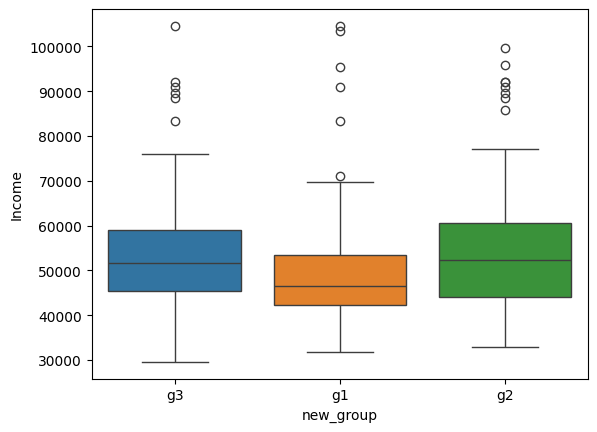

In [13]:
sns.boxplot(x = df['new_group'], y = df['Income'], hue = df['new_group'])
plt.show()

In [ ]:
# checking if these groups means are different from each other
# H0: means of above 3 gropus are same
# Ha: atleast one mean is different fro other

In [20]:
# lest calculate the means of these groups
g1_income = df[df['new_group']== 'g1']['Income']
g2_income = df[df['new_group']== 'g2']['Income']
g3_income = df[df['new_group']== 'g3']['Income']

In [24]:
g1mean = g1_income.mean()
g2mean = g2_income.mean()
g3mean = g3_income.mean()
print(g1mean, g2mean, g3mean)

51840.44827586207 55812.69642857143 53594.954545454544


In [28]:
res = f_oneway(g1_income, g2_income, g3_income)
res.pvalue

0.43933541801191467

In [29]:
if res.pvalue < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


In [ ]:
# Is there any relation between means of products with Income

<Axes: xlabel='Product', ylabel='Income'>

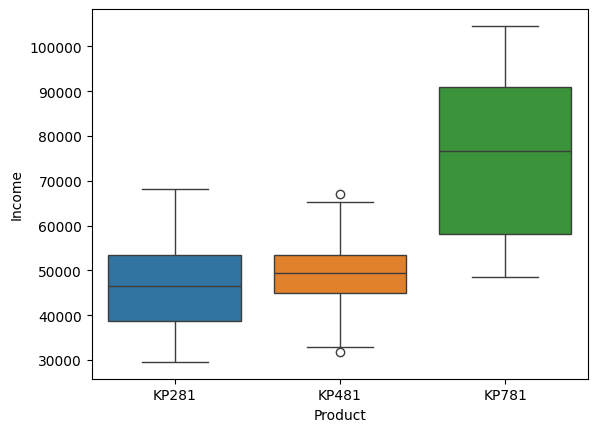

In [33]:
sns.boxplot(x = df['Product'], y = df['Income'], hue = df['Product'])

In [37]:
Income_KP281 = df[df['Product'] == 'KP281'].Income
Income_KP481 = df[df['Product'] == 'KP481'].Income
Income_KP781 = df[df['Product'] == 'KP781'].Income

In [38]:
Income_KP281.mean()

46418.025

In [39]:
Income_KP481.mean()

48973.65

In [40]:
Income_KP781.mean()

75441.575

In [41]:
res = f_oneway(Income_KP281, Income_KP481, Income_KP781)

In [44]:
if res.pvalue < 0.05:
  print('Reject the null hypothesis that all the means are same. Means atleast one of the means is different from other')
else:
  print('Fail to reject the null hypothesis - means all the means are same')


Reject the null hypothesis that all the means are same. Means atleast one of the means is different from other


In [ ]:
# H0: all the means are same
# Ha: atleast one mean is different

In [45]:
### Question 1

In [46]:
a = [13, 8, 11, 12, 11]
b = [15, 10, 16, 11, 13, 10]
c = [5, 11, 9, 5]
d = [8, 10, 6, 5, 7]

In [ ]:
# H0: means are same for all the above
# Ha: atleast one mean is different

In [47]:
res = f_oneway(a,b,c,d)

In [49]:
res.pvalue

0.0049302919205628576

In [48]:
if res.pvalue < 0.05:
  print('Reject the null hypothesis')
else:
  print('Fail to reject the null hypothesis')

Reject the null hypothesis


In [50]:
one_star = [382, 391, 335, 368, 400, 372]
two_star = [560, 343, 512, 329, 391, 367]
three_star = [384, 458, 409, 309, 374, 459]
four_star = [325, 390, 304, 240, 306, 169]
five_star = [360, 298, 272, 368, 320, 326]

In [51]:
res = f_oneway(one_star, two_star, three_star, four_star, five_star)

In [52]:
print(res.pvalue)
if res.pvalue < 0.01:
  print('Reject')
else:
  print('Fail to reject')

0.009362001936328837
Reject


In [53]:
Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

In [55]:
res = f_oneway(Brand_A, Brand_B,Brand_C,Brand_D)
res.pvalue < 0.02

True

In [ ]:
# Means of all the